In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

In [3]:
df.shape

(17290, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.head(200)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,5,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,8,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,9,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [30]:
df_mod = df.drop(['date', 'id', 'view', 'lat', 'long'], axis=1).reset_index(drop=True)

In [31]:
df_mod

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,0,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,98058,2390,7700
1,1,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,98115,2370,6283
2,2,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,0,1997,0,98006,3710,9685
3,3,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,0,1990,0,98034,4050,14226
4,4,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,98052,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,750000.0,5,2.50,3240,9960,1.0,0,3,8,2020,1220,1958,0,98008,2730,10400
17286,17286,440000.0,2,1.75,1300,4000,2.0,0,3,7,1300,0,1948,0,98105,1350,4013
17287,17287,310000.0,3,1.00,1050,9876,1.0,0,3,7,1050,0,1953,0,98028,1760,9403
17288,17288,427500.0,3,1.50,1900,43186,1.5,0,4,7,1300,600,1971,0,98038,2080,108028


In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

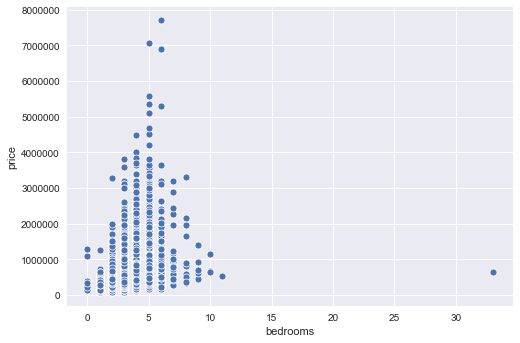

In [39]:
sns.scatterplot(df.bedrooms, df.price)

In [34]:
formula = "price ~ bedrooms+bathrooms+sqft_living"
model = ols(formula= formula, data=df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5967.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:11:07   Log-Likelihood:            -2.4022e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17286   BIC:                         4.805e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.627e+04   7801.426      8.494      0.000     5.1e+04    8.16e+04
bedrooms    -5.711e+04   2606.363    -21.911      0.000   -6.22e+04    -5.2e+04
bathrooms    4559.3869   3982.099      1.145      0.252   -3245.931    1.24e+04
sqft_living   315.8543      3.498     90.306      0.000     308.999     322.710
==============================================================================
Omnibus:                    12031.590   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458006.040
Skew:                           2.870   Prob(JB):                         0.00
Kurtosis:                      27.552   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df.zipcode.unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039])

In [12]:
locs = list(zip(df_zip.lat, df_zip.long))
locs

[(47.6784, -122.285),
 (47.6807, -122.318),
 (47.7009, -122.317),
 (47.6763, -122.267),
 (47.6765, -122.32),
 (47.6925, -122.32),
 (47.6727, -122.297),
 (47.6741, -122.271),
 (47.6872, -122.296),
 (47.6763, -122.282),
 (47.6919, -122.313),
 (47.6955, -122.295),
 (47.6944, -122.274),
 (47.6745, -122.287),
 (47.6847, -122.291),
 (47.6855, -122.321),
 (47.6774, -122.325),
 (47.6827, -122.289),
 (47.6832, -122.304),
 (47.6886, -122.309),
 (47.6936, -122.294),
 (47.6784, -122.277),
 (47.6769, -122.328),
 (47.6882, -122.306),
 (47.676, -122.309),
 (47.6784, -122.304),
 (47.6854, -122.291),
 (47.6732, -122.29),
 (47.6819, -122.311),
 (47.6737, -122.283),
 (47.6755, -122.285),
 (47.6821, -122.308),
 (47.6929, -122.287),
 (47.6776, -122.318),
 (47.6776, -122.324),
 (47.6834, -122.306),
 (47.6971, -122.317),
 (47.6826, -122.298),
 (47.6746, -122.315),
 (47.6842, -122.309),
 (47.6887, -122.307),
 (47.688, -122.281),
 (47.6826, -122.311),
 (47.6846, -122.268),
 (47.6768, -122.326),
 (47.6793, -122

In [13]:
import folium

In [14]:
df.lat[0]
df.long[0]

-122.162

In [15]:
m = folium.Map(
    location=[47.4388, -122.162],
    zoom_start=12,
    tiles='Stamen Terrain'
)

# folium.Marker(
#     location=[47.4388, -122.162],
    icon=folium.Icon(color='green')
# ).add_to(m)

for i in locs[:50]:
    folium.Marker(
    location=[i[0],i[1]]
    ).add_to(m)

In [16]:
m